# Exploratory Data Analysis (Penguins Data Set)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [2]:
data = pd.read_csv("C:/Users/Pallavi K R/Desktop/Pal/penguins.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 14.8+ KB


In [4]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Summarise categorical values
data.describe(include=['object'])

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


In [6]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Treating Missing Values

In [24]:
data['culmen_length_mm'].fillna(value=data['culmen_length_mm'].mean(), inplace=True)
data['culmen_depth_mm'].fillna(value=data['culmen_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(value=data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(value=data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(value=data['sex'].mode().iloc[0], inplace=True)
data['sex'] = data['sex'].str.replace(".","MALE")

In [ ]:
x = txt.replace("bananas", "apples")

In [22]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Data Visualisation - Species count

C:\Users\AncSoftware\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

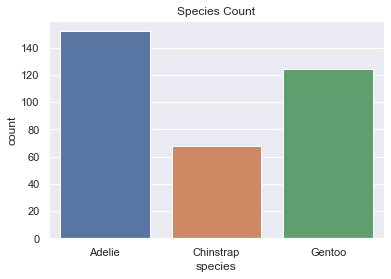

In [11]:
plt.title('Species Count')
sns.countplot(data['species'])

### Uni-variate Analysis

#### Comparison between various species based on Culmen_length and culmen_depth

C:\Users\AncSoftware\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on culmen_length and culmen_depth'}, xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

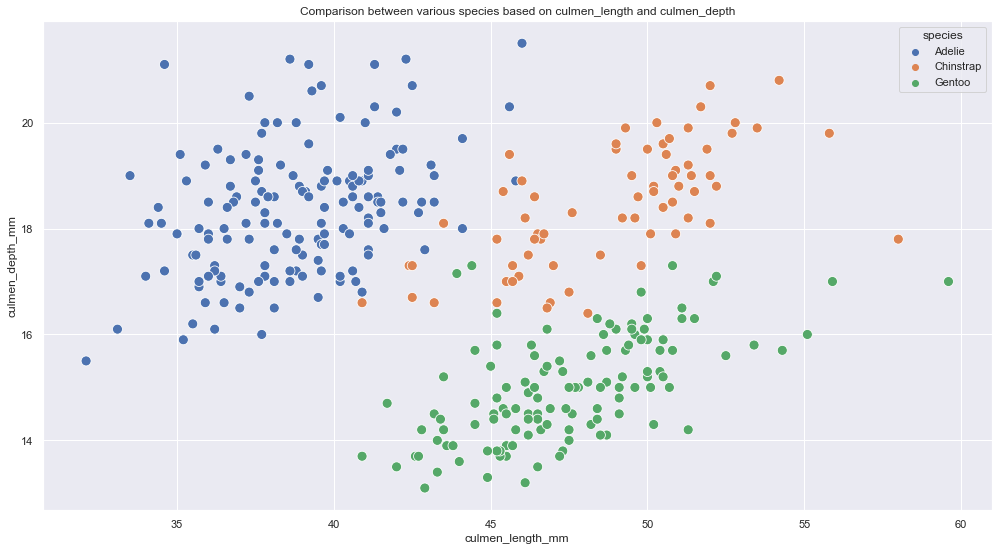

In [12]:
plt.figure(figsize=(17,9))
plt.title('Comparison between various species based on culmen_length and culmen_depth')
sns.scatterplot(data['culmen_length_mm'],data['culmen_depth_mm'],hue =data['species'],s=100)

### Data Insights:

##### Penguins Adelie species has higher culmen_depth but lower length.
##### Penguins Chinstrap species has average culmen_depth and higher length
##### Penguins Gentoo species has lower culmen_depth but higherr length

### Comparison between various species based on flipper_length and	body_mass

C:\Users\AncSoftware\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on flipper_length and body_mass'}, xlabel='flipper_length_mm', ylabel='body_mass_g'>

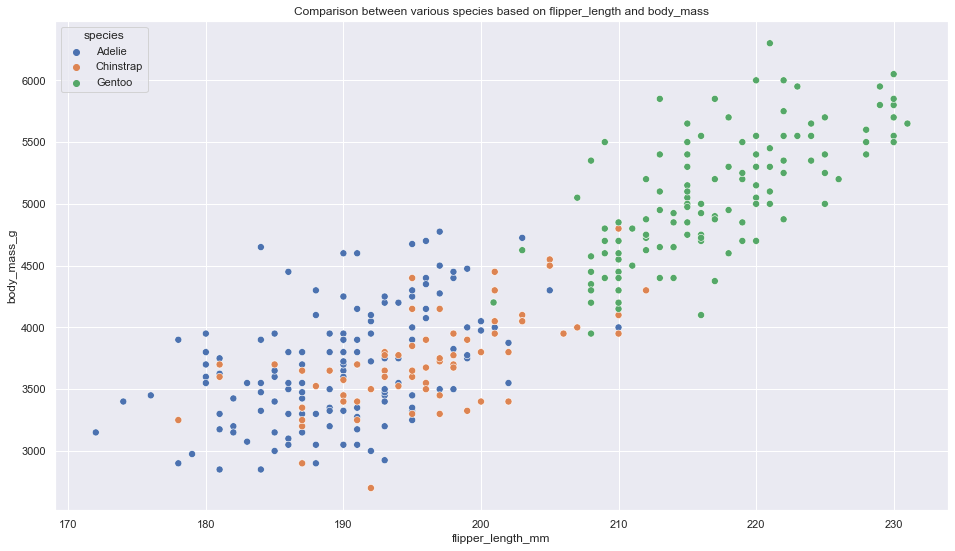

In [13]:
plt.figure(figsize=(16,9))
plt.title('Comparison between various species based on flipper_length and body_mass')
sns.scatterplot(data['flipper_length_mm'], data['body_mass_g'], hue = data['species'], s= 50)

### Data Insights
#### Gentoo species have the higher body_mass and flipper_length
#### Adelie and Chinstrap are in mid range

### Bi-variate Analysis

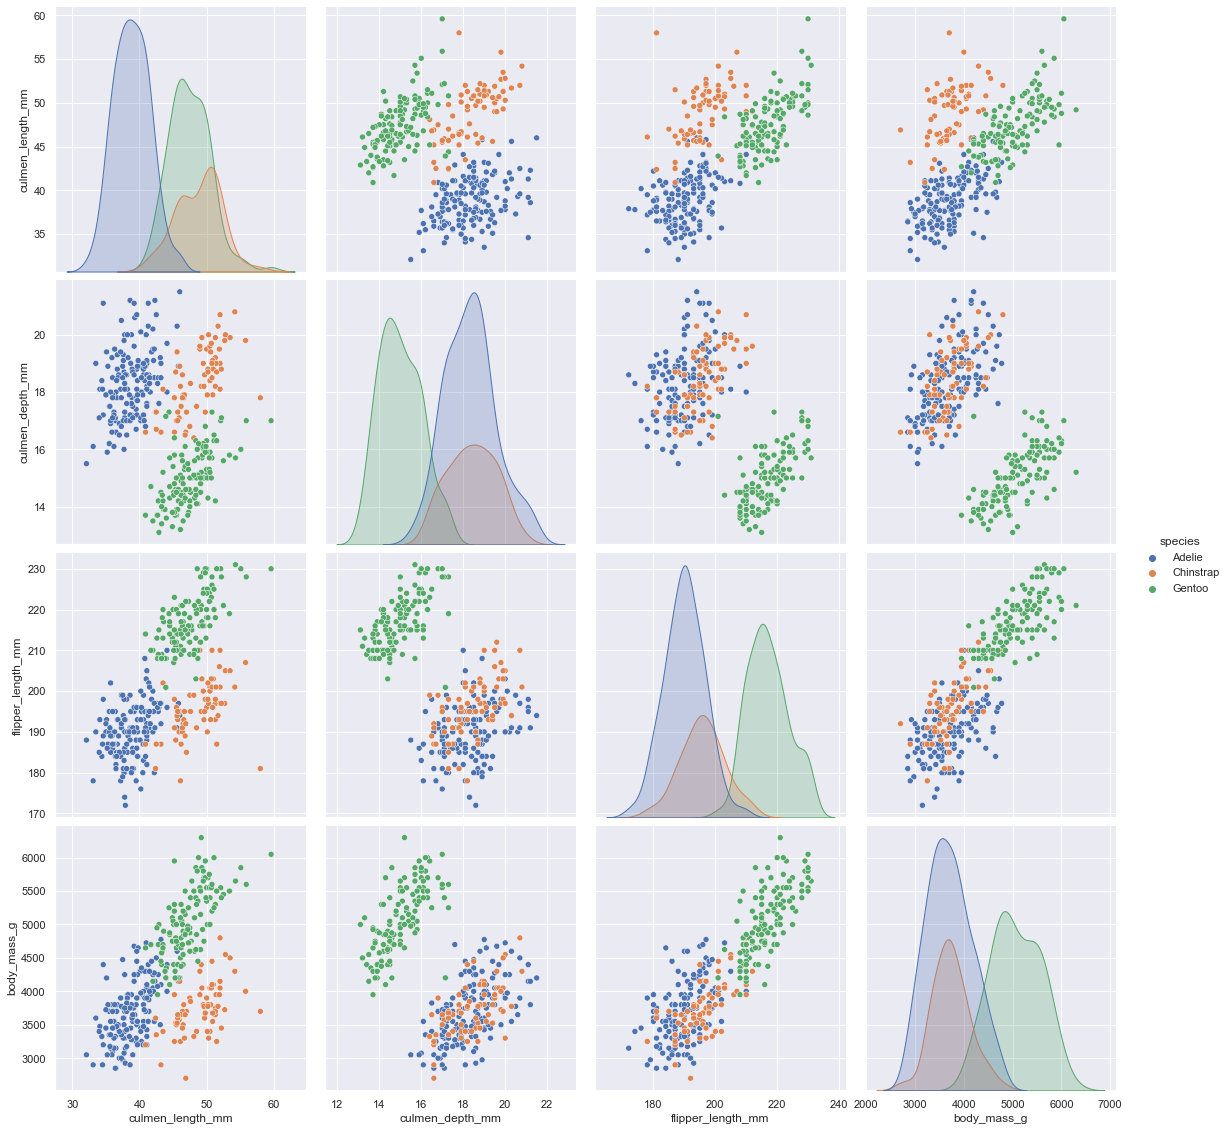

In [14]:
sns.pairplot(data,hue="species",height=4)

### Checking Correlation

[]

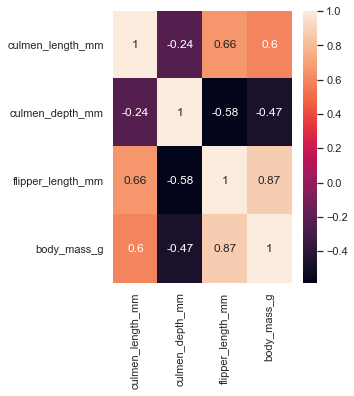

In [15]:
plt.figure(figsize=(4,5))
sns.heatmap(data.corr(),annot=True)
plt.plot()

### Checking Mean & Median Values for each species

In [16]:
data.groupby('species').agg(['mean', 'median'])

culmen_length_mm        culmen_depth_mm        flipper_length_mm  \
                      mean median            mean median              mean   
species                                                                      
Adelie           38.825144  38.80       18.338495  18.40        190.025758   
Chinstrap        48.833824  49.55       18.420588  18.45        195.823529   
Gentoo           47.475983  47.25       14.999606  15.00        217.055768   

                  body_mass_g          
          median         mean  median  
species                                
Adelie     190.0  3703.958910  3700.0  
Chinstrap  196.0  3733.088235  3700.0  
Gentoo     216.0  5068.965761  5000.0

### Box plots to know about distribution
#### boxplot to see how the categorical feature “Species” is distributed with all other four input variables

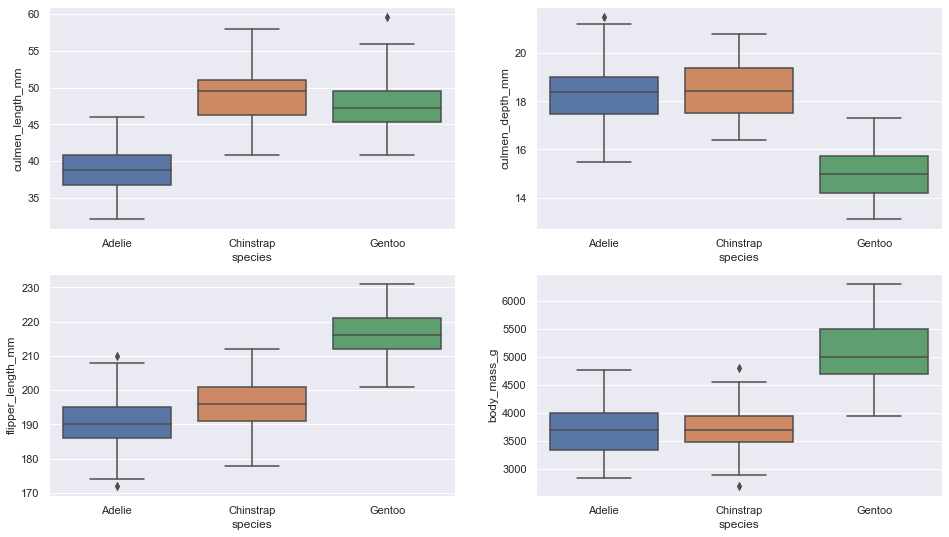

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y="culmen_length_mm", x= "species", data=data, orient='v' , ax=axes[0, 0])
sns.boxplot( y="culmen_depth_mm", x= "species", data=data, orient='v' , ax=axes[0, 1])
sns.boxplot( y="flipper_length_mm", x= "species", data=data, orient='v' , ax=axes[1, 0])
sns.boxplot( y="body_mass_g", x= "species", data=data, orient='v' , ax=axes[1, 1])
plt.show()

### Data Insights:
#### Adelie is having smaller feature and higher Culmen depth
#### Chinstrap is distributed in a average manner and higher Culmen depth and length
#### Virginica is highly distributed with higher features but lower culmen depth

### Violin Plot for checking distribution
#### The violin plot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

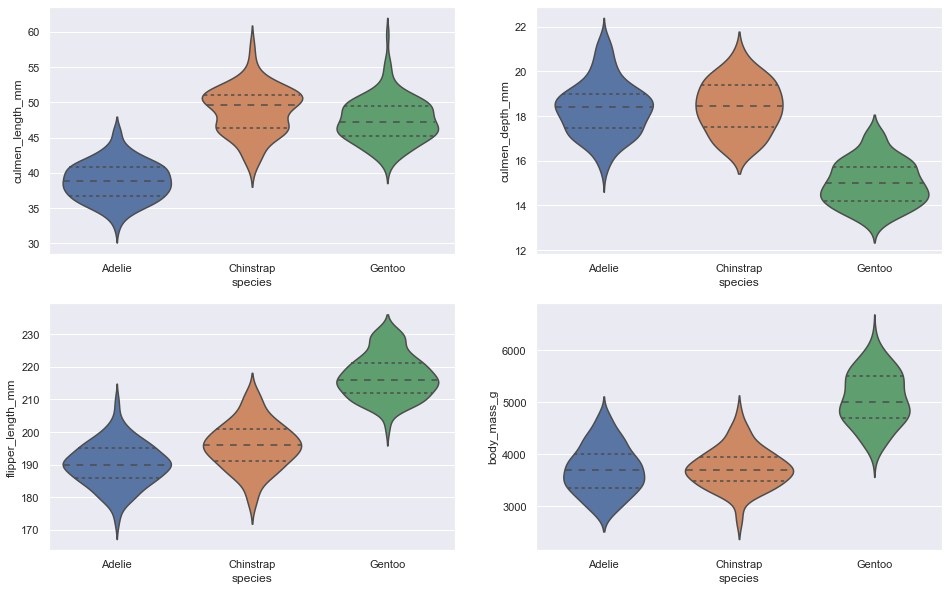

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y="culmen_length_mm", x= "species", data=data, orient='v' , ax=axes[0, 0],inner='quartile')
sns.violinplot( y="culmen_depth_mm", x= "species", data=data, orient='v' , ax=axes[0, 1],inner='quartile')
sns.violinplot( y="flipper_length_mm", x= "species", data=data, orient='v' , ax=axes[1, 0],inner='quartile')
sns.violinplot( y="body_mass_g", x= "species", data=data, orient='v' , ax=axes[1, 1],inner='quartile')
plt.show()

### Plotting the Histogram & Probability Density Function (PDF)
#### plotting the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.

C:\Users\AncSoftware\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AncSoftware\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AncSoftware\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

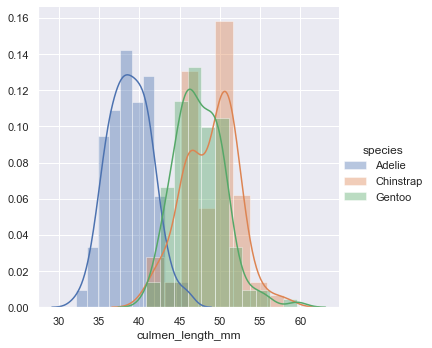

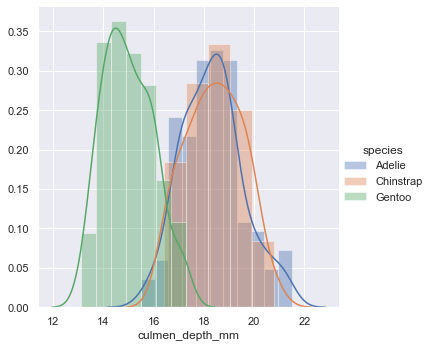

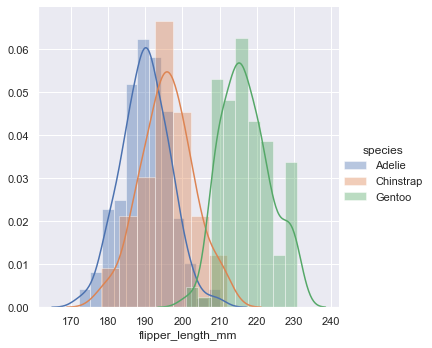

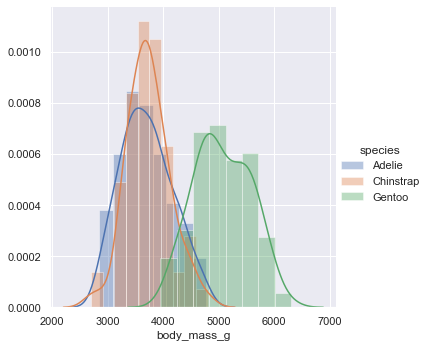

In [19]:
sns.FacetGrid(data, hue="species", height=5) \
.map(sns.distplot, "culmen_length_mm") \
.add_legend()
sns.FacetGrid(data, hue="species", height=5) \
.map(sns.distplot, "culmen_depth_mm") \
.add_legend()
sns.FacetGrid(data, hue="species", height=5) \
.map(sns.distplot, "flipper_length_mm") \
.add_legend()
sns.FacetGrid(data, hue="species", height=5) \
.map(sns.distplot, "body_mass_g") \
.add_legend()
plt.show()

### Data Insights:
#### All the shows that there is a significant amount of overlap between all the features of species , so it is not an effective Classification feature


## Treating Categeorical Values

### Applying One HOT Encoding

In [ ]:
## data2=pd.get_dummies(data)
## data2.head()

In [ ]:
## data2.shape

In [25]:
final_data=pd.get_dummies(data,drop_first=True)
final_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,0,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,0,1,0


In [26]:
final_data.shape

(344, 9)

In [27]:
final_data.sample(frac=0.05)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
43,44.1,19.7,196.0,4400.0,0,0,1,0,1
166,45.9,17.1,190.0,3575.0,1,0,1,0,0
76,40.9,16.8,191.0,3700.0,0,0,0,1,0
328,43.3,14.0,208.0,4575.0,0,1,0,0,0
81,42.9,17.6,196.0,4700.0,0,0,0,1,1
305,50.8,17.3,228.0,5600.0,0,1,0,0,1
326,41.7,14.7,210.0,4700.0,0,1,0,0,0
198,50.1,17.9,190.0,3400.0,1,0,1,0,0
156,52.7,19.8,197.0,3725.0,1,0,1,0,1
318,48.4,14.4,203.0,4625.0,0,1,0,0,0
